# Question-1


# Part-1) RNN
Perform stock prediction using RNN for the given configurations

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [49]:
df=pd.read_csv('../input_data/GoogleStocks.csv')
df=df.iloc[1:]
df=df.convert_objects(convert_numeric=True)
df.sort_values(by=['date'],inplace=True,ascending=True)
df.isna().any()
cols=['low','high']
df['average']=df[cols].astype(float).mean(axis=1)

data_av=pd.DataFrame([df.average,df.volume]).transpose()
data_o=pd.DataFrame([df.open]).transpose()

train,test=np.split(data_av,[int(.8*len(data_av))])
train_target,test_target=np.split(data_o,[int(.8*len(data_o))])

/home/prabha/.local/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until


In [48]:
sc=MinMaxScaler(feature_range=(0,1))
train=sc.fit_transform(train)
sc_o=MinMaxScaler(feature_range=(0,1))
train_target=sc_o.fit_transform(train_target)

In [47]:
def create_x_and_y(train_x,train_y,timestamp):
    x=[]
    y=[]
    for i in range(timestamp,len(train_x)):
        x.append(train_x[i-timestamp:i])
        y.append(train_y[i])
    
    x=np.array(x)
    print x.shape
    y=np.array(y)
    x=np.reshape(x,(x.shape[0],x.shape[1],2))
    return x,y

In [46]:
def build_rnn(cells,hidden_layers,x,y):
    regressor = Sequential()
    regressor.add(LSTM(units=cells,return_sequences=True,input_shape=(x.shape[1],2)))
    regressor.add(Dropout(0.2))
    for i in range(hidden_layers-1):
        regressor.add(LSTM(units=cells,return_sequences=True))
        regressor.add(Dropout(0.2))
    regressor.add(LSTM(units=cells))
    regressor.add(Dropout(0.2))
    regressor.add(Dense(units=1))
    regressor.compile(optimizer='adam',loss='mean_squared_error')

    regressor.fit(x,y,epochs=100,batch_size=32,verbose=0)
    return regressor

In [45]:
def predict(regressor,test,data,timestamp,sc,sc_o):
    inputs=data[len(data)-len(test)-timestamp:].values
    inputs=inputs.reshape(-1,2)
    inputs=sc.transform(inputs)
    x=[]
    for i in range(timestamp,timestamp+len(test)):
        x.append(inputs[i-timestamp:i])
    x=np.array(x)
    x=np.reshape(x,(x.shape[0],x.shape[1],2))
    predicted_price=regressor.predict(x)
    predicted_price=sc_o.inverse_transform(predicted_price)
    return predicted_price

In [44]:
def plot_graph(predicted_price,test_dataset):
    plt.plot(test_dataset, color = 'red', label = 'Real Google Stock Price')
    plt.plot(predicted_price, color = 'blue', label = 'Predicted Google Stock Price')
    plt.title('Google Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Google Stock Price')
    plt.legend()
    plt.show()

In [43]:
def print_all_graphs(train,train_target,test,data_av,sc,sc_o,test_target):
    hidden_layer=[2,3]
    cells=[30,50,80]
    timestamps=[20,50,75]
    for i in hidden_layer:
        for j in cells:
            for k in timestamps:
                print "Model for ",i," hidden layers ",j," cells per hidden layer and ",k," timestamps."
                x,y=create_x_and_y(train,train_target,k)
                regressor=build_rnn(j,i,x,y)
                predicted_price=predict(regressor,test,data_av,k,sc,sc_o)
                plot_graph(predicted_price,test_target.values)

Model for  2  hidden layers  30  cells per hidden layer and  20  timestamps.
(584, 20, 2)
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


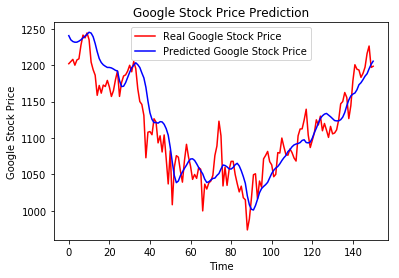

Model for  2  hidden layers  30  cells per hidden layer and  50  timestamps.
(554, 50, 2)


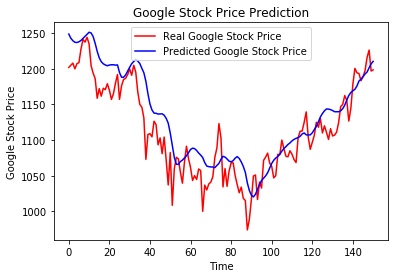

Model for  2  hidden layers  30  cells per hidden layer and  75  timestamps.
(529, 75, 2)


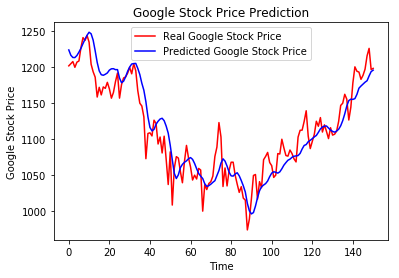

Model for  2  hidden layers  50  cells per hidden layer and  20  timestamps.
(584, 20, 2)


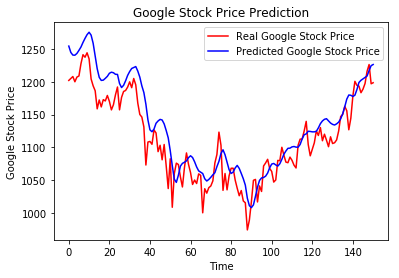

Model for  2  hidden layers  50  cells per hidden layer and  50  timestamps.
(554, 50, 2)


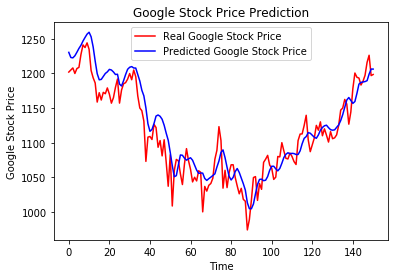

Model for  2  hidden layers  50  cells per hidden layer and  75  timestamps.
(529, 75, 2)


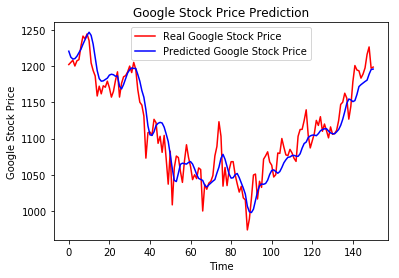

Model for  2  hidden layers  80  cells per hidden layer and  20  timestamps.
(584, 20, 2)


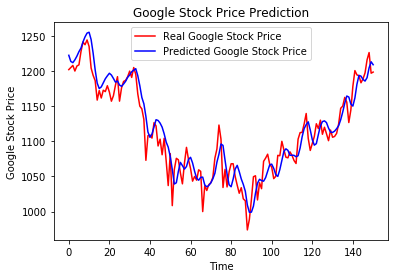

Model for  2  hidden layers  80  cells per hidden layer and  50  timestamps.
(554, 50, 2)


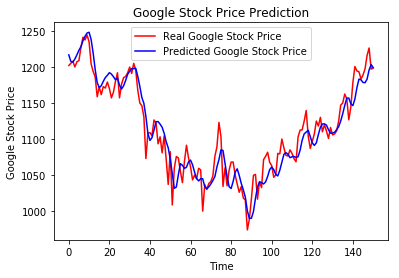

Model for  2  hidden layers  80  cells per hidden layer and  75  timestamps.
(529, 75, 2)


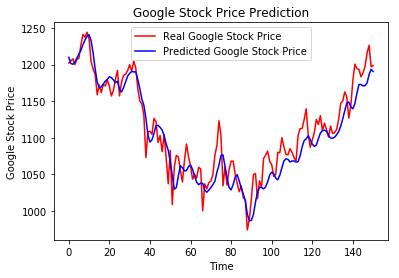

Model for  3  hidden layers  30  cells per hidden layer and  20  timestamps.
(584, 20, 2)


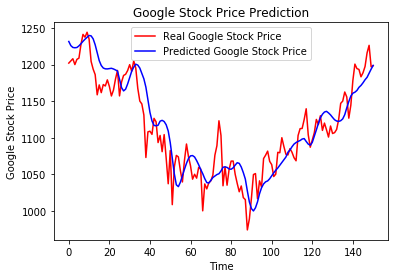

Model for  3  hidden layers  30  cells per hidden layer and  50  timestamps.
(554, 50, 2)


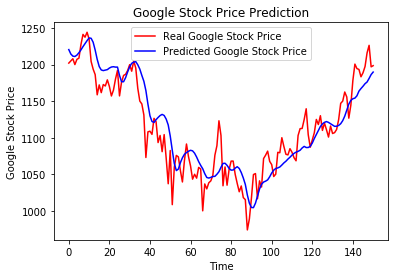

Model for  3  hidden layers  30  cells per hidden layer and  75  timestamps.
(529, 75, 2)


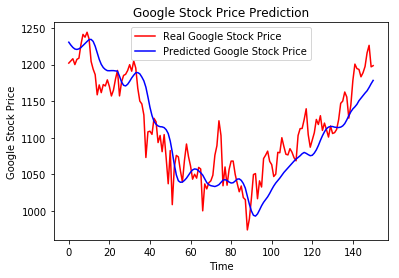

Model for  3  hidden layers  50  cells per hidden layer and  20  timestamps.
(584, 20, 2)


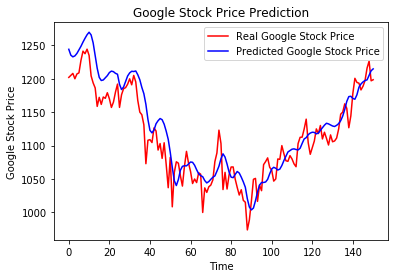

Model for  3  hidden layers  50  cells per hidden layer and  50  timestamps.
(554, 50, 2)


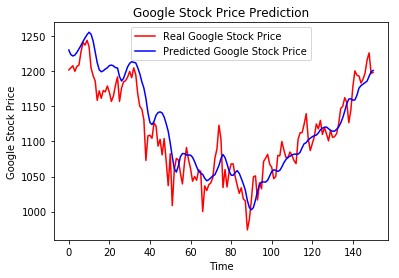

Model for  3  hidden layers  50  cells per hidden layer and  75  timestamps.
(529, 75, 2)


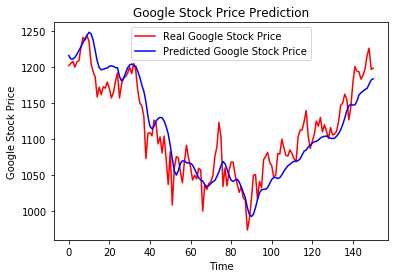

Model for  3  hidden layers  80  cells per hidden layer and  20  timestamps.
(584, 20, 2)


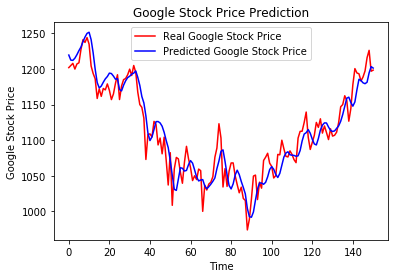

Model for  3  hidden layers  80  cells per hidden layer and  50  timestamps.
(554, 50, 2)


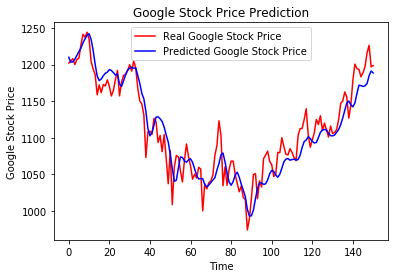

Model for  3  hidden layers  80  cells per hidden layer and  75  timestamps.
(529, 75, 2)


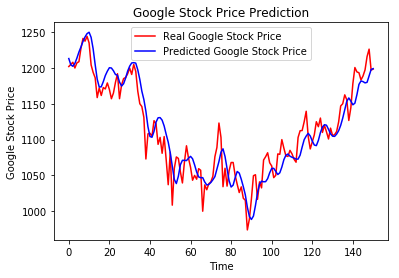

In [9]:
print_all_graphs(train,train_target,test,data_av,sc,sc_o,test_target)

# Part-2) HMM
Perform stock prediction using HMM for given configurations

In [31]:
def feature_extraction(average,open_val):
    return ((average-open_val)/open_val).reshape(-1,1)

In [22]:
from hmmlearn.hmm import GaussianHMM

In [23]:
def create_hmm(train_open,train_avg,hidden_layers,timestamp):
    hmm = GaussianHMM(n_components=hidden_layers)
    average=train_avg
    open_val=train_open
    feature_vector = feature_extraction(average,open_val)
    hmm.fit(feature_vector)
    return hmm

In [24]:
def calculate_index(value):
    return max(0,value)

def predict(hmm,test_rows,test_open,timestamps,test_average):
    possibleOutcomes=np.linspace(-0.1, 0.1, 50)
    predicted_prices=[]
    for i in range(test_rows):
        price=test_open[i]
        starting_pt=calculate_index((i-timestamps))
        end_pt=calculate_index((i-1))
        previous_avg=test_average[end_pt:starting_pt]
        previous_open=test_open[end_pt:starting_pt]
        features_extracted=feature_extraction(previous_avg,previous_open)
        score=[]
        for p in possibleOutcomes:
            data=np.row_stack((features_extracted,p))
            score.append(hmm.score(data))
        outcome=possibleOutcomes[np.argmax(score)]
        price=price*(1+outcome)
        predicted_prices.append(price)
    return predicted_prices

In [25]:
df=pd.read_csv('../input_data/GoogleStocks.csv')
df=df.iloc[1:]
df=df.convert_objects(convert_numeric=True)
df.sort_values(by=['date'],inplace=True,ascending=True)
df.isna().any()
cols=['low','high']
df['average']=df[cols].astype(float).mean(axis=1)

data_av=pd.DataFrame([df.average,df.volume]).transpose()
data_o=pd.DataFrame([df.open]).transpose()

train,test=np.split(data_av,[int(.8*len(data_av))])
train_target,test_target=np.split(data_o,[int(.8*len(data_o))])

/home/prabha/.local/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until


In [26]:
# print train

train_avg=train['average'].values
test_rows=test.shape[0]
test_average=test['average'].values

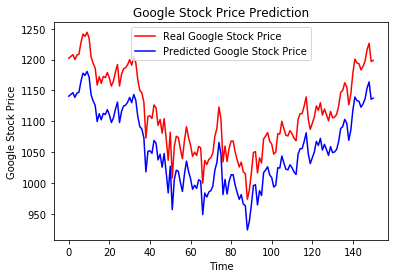

In [32]:
hmm=create_hmm(train_target.values,train_avg,4,20)
predict_val=predict(hmm,test_rows,test_target.values,20,test_average)
plot_graph(predict_val,test_target.values)

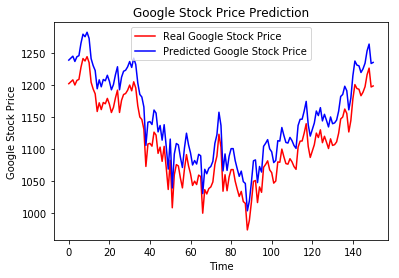

In [33]:
hmm1=create_hmm(train_target.values,train_avg,8,20)
predict_val1=predict(hmm1,test_rows,test_target.values,20,test_average)
plot_graph(predict_val1,test_target.values)

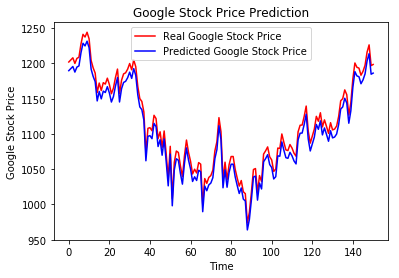

In [34]:
hmm2=create_hmm(train_target.values,train_avg,12,20)
predict_val2=predict(hmm2,test_rows,test_target.values,20,test_average)
plot_graph(predict_val2,test_target.values)

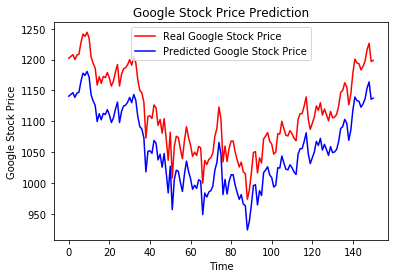

In [35]:
hmm3=create_hmm(train_target.values,train_avg,4,50)
predict_val3=predict(hmm3,test_rows,test_target.values,50,test_average)
plot_graph(predict_val3,test_target.values)

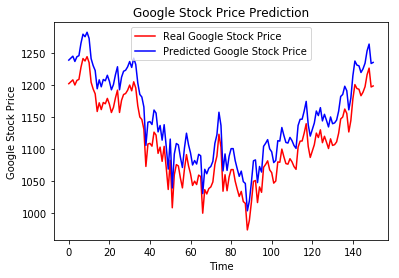

In [36]:
hmm4=create_hmm(train_target.values,train_avg,8,50)
predict_val4=predict(hmm4,test_rows,test_target.values,50,test_average)
plot_graph(predict_val4,test_target.values)

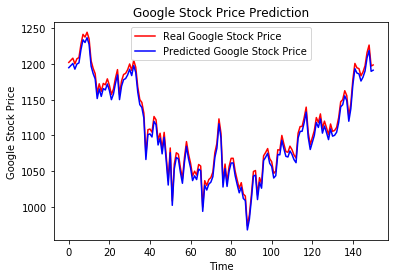

In [37]:
hmm5=create_hmm(train_target.values,train_avg,12,50)
predict_val5=predict(hmm5,test_rows,test_target.values,50,test_average)
plot_graph(predict_val5,test_target.values)

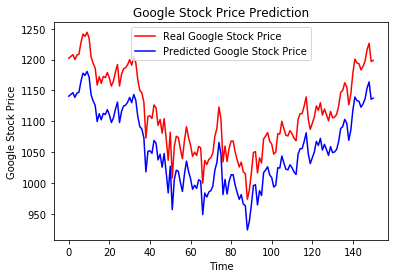

In [38]:
hmm6=create_hmm(train_target.values,train_avg,4,75)
predict_val6=predict(hmm6,test_rows,test_target.values,75,test_average)
plot_graph(predict_val6,test_target.values)

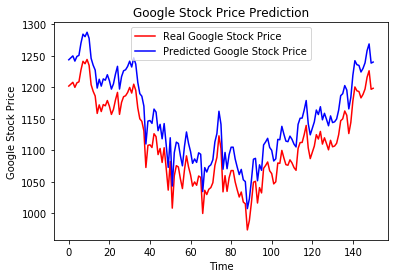

In [39]:
hmm7=create_hmm(train_target.values,train_avg,8,75)
predict_val7=predict(hmm7,test_rows,test_target.values,75,test_average)
plot_graph(predict_val7,test_target.values)

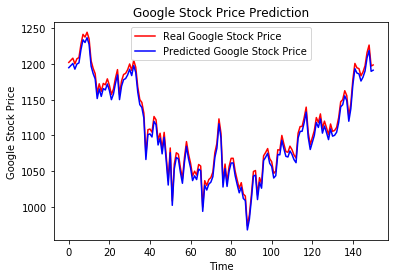

In [40]:
hmm8=create_hmm(train_target.values,train_avg,12,75)
predict_val8=predict(hmm8,test_rows,test_target.values,75,test_average)
plot_graph(predict_val8,test_target.values)

# Part-3)
**HMM vs RNN**

HMMs make the markovian assumption, i.e., you assume that current state depends only on previous state, RNN on the other hand takes into consideration all the data that came before in an efficient manner. This poses a limitation of temporal context on HMM due to markov assumption.
So if our data satisfy that assumption roughly, HMMs might be the preferred method, because RNNs might find spurious patterns, and hence overfit. 


One can view RNNs as a sort of generalization to markov chains. RNNs have the advantage of a memory, context tracking and are not limited to learning patterns of some specific length.


Above point can be understood easily from following formulas:

**Markov chains model:
p(x1....xn)=p(x1)p(x2|x1)p(x3|x2)...**

**RNNs attempt to model:
p(x1....xn)=p(x1)p(x2|x1)p(x3|x2,x1)p(x4|x3,x2,x1)...**

Hence, RNN is able to keep track of long-distant dependencies.

Also with HMMs, the inputs and the outputs have a one-to-one correspondence, again markov assumption is responsible for the same.

**HMM: hidden layers=8 and timestamp=20**

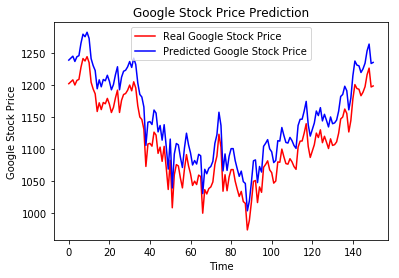

In [41]:
plot_graph(predict_val1,test_target.values)

**RNN: Model for  3  hidden layers  80  cells per hidden layer and  20  timestamps.**


<img src="./rnn.png">